<a href="https://colab.research.google.com/github/vsmataev/python_seminars/blob/main/%D0%94%D0%97_%D0%BA%D0%BE_2_%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# Настройка отображения для избежания научной нотации
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Задание 2**

*Проведите первичный анализ данных*
1. Изучите типы данных
2. Найдите количество пропущенных ячеек в данных
3. Посчитайте основные статистики по всем признакам и
поизучайте их
4. Пишите выводы

In [60]:
print(df.dtypes)
print()
print(df.isna().sum())
print()
print('жилая площадь превышает общую:', len(df[df['sqft_living'] > df['sqft_lot']]), 'строк')

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

жилая площадь превышает общую: 789 строк


**Далее анализ проводится с учетом того, что, возможно, 789 строк заполнены с ошибками (жилая площадь превышает общую) и не должны учитываться**

In [71]:
# Создаем копию DataFrame, чтобы избежать изменений в исходных данных
df_copy = df.copy()

# Ищем дефектные строки,
indexes_to_drop = df_copy[df_copy['sqft_living'] > df_copy['sqft_lot']].index

# Удаляем эти строки из копии DataFrame
df_copy = df_copy.drop(indexes_to_drop)

In [72]:
# Выбор нужных столбцов и вывод основных статистических характеристик
print(df_copy[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement']].describe())

           price  bedrooms  bathrooms  sqft_living   sqft_lot   floors  \
count   20824.00  20824.00   20824.00     20824.00   20824.00 20824.00   
mean   541440.92      3.39       2.10      2098.54   15630.40     1.46   
std    371522.42      0.93       0.77       925.27   42108.81     0.51   
min     75000.00      0.00       0.00       290.00     772.00     1.00   
25%    320000.00      3.00       1.50      1440.00    5331.75     1.00   
50%    450000.00      3.00       2.25      1940.00    7767.50     1.00   
75%    650000.00      4.00       2.50      2570.00   10888.50     2.00   
max   7700000.00     33.00       8.00     13540.00 1651359.00     3.50   

         grade  sqft_above  sqft_basement  
count 20824.00    20824.00       20824.00  
mean      7.64     1803.89         294.66  
std       1.19      835.98         447.74  
min       1.00      290.00           0.00  
25%       7.00     1200.00           0.00  
50%       7.00     1580.00           0.00  
75%       8.00     2240.0

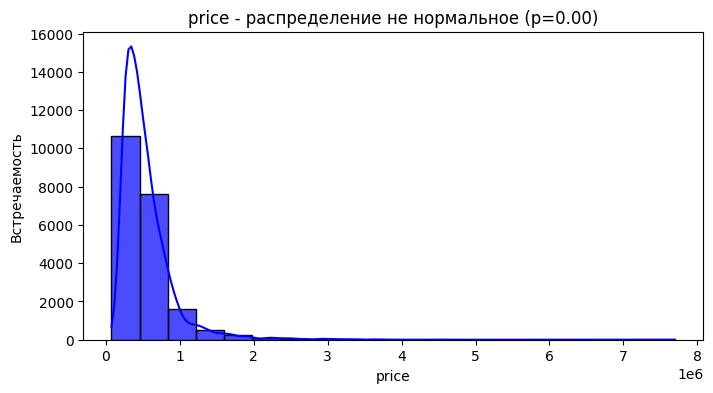

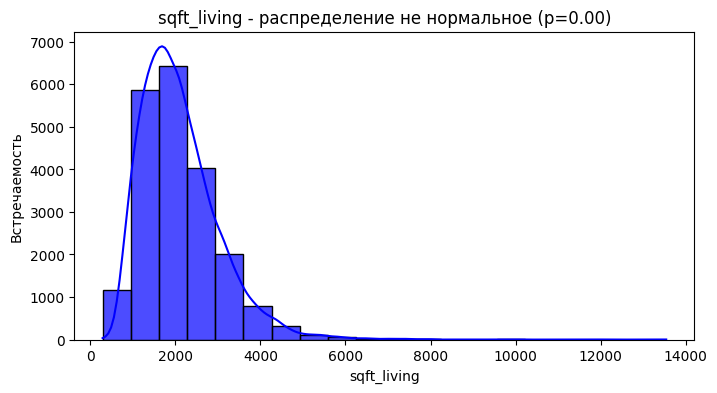

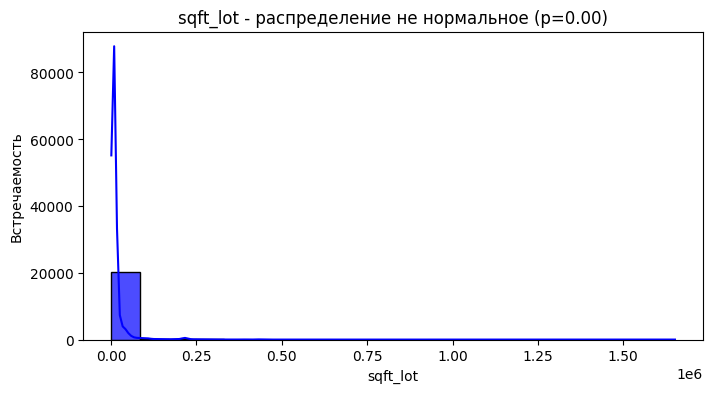

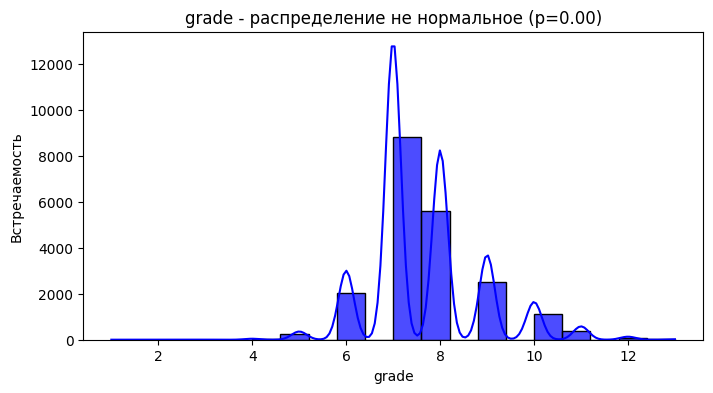

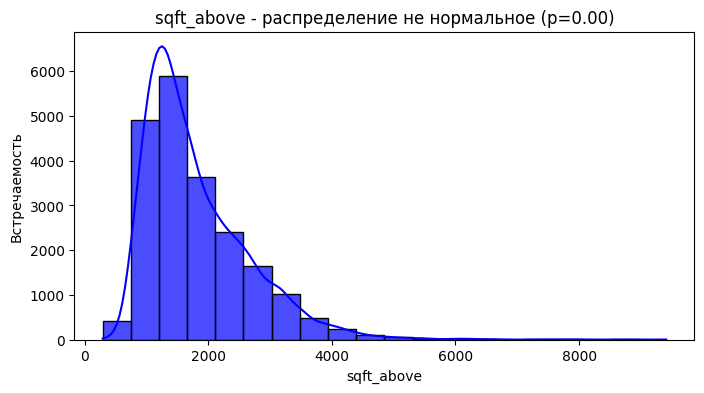

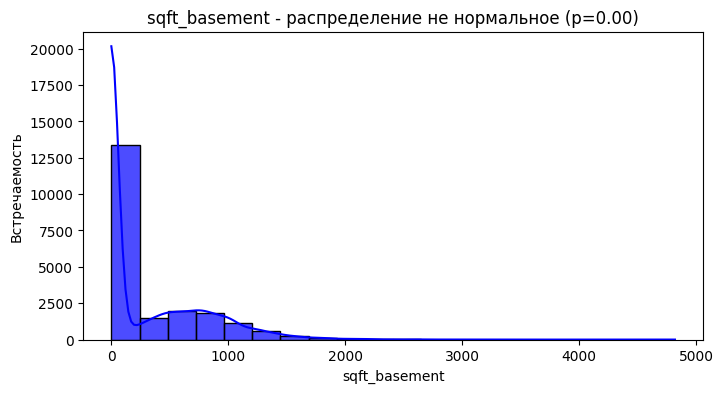

In [101]:

# Проверка на нормальность методом Колмогорова-Смирнова (сразу в виде функции - НА ПОТОМ)
def plot_and_test_normality(dataframe, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))

        # Построение графика
        sns.histplot(dataframe[column], bins=20, kde=True, color='blue', alpha=0.7)
        plt.title(f'Распределение {column}')
        plt.xlabel(column)
        plt.ylabel('Встречаемость')

        # Проверка на нормальность распределения
        statistic, p_value = stats.kstest(dataframe[column], 'norm')
        p_value_str = "{:.2f}".format(p_value)
        # Вывод результата теста в заголовок графика
        if p_value > 0.05:
           plt.title(f'{column} - распределение нормальное - (p={p_value_str})')
        else:
           plt.title(f'{column} - распределение не нормальное (p={p_value_str})')

        plt.show()

plot_and_test_normality(df_copy, ['price', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement'])

**Задача 3:**

*Ответьте на несколько вопросов*

3.1 В каком диапазоне изменяются стоимости недвижимости?

3.2 Какую долю в среднем занимают жилая площадь от всей площади по всем
домам?

3.3 Как много домов с разными этажами в данных?

3.4 Насколько хорошие состояния у домов в данных?

3.5 Найдите года, когда построили первый дом, когда построили последний дом в
данных?

In [70]:
# Исключаем строки, где жилая площадь превышает общую
df = df_copy[df['sqft_living'] <= df['sqft_lot']]

# 3.1 Диапазон изменения стоимостей недвижимости
price_range = df_copy['price'].describe()[['min', 'max']]
print("Диапазон изменения стоимостей недвижимости:", price_range)
print()

# 3.2 Доля жилой площади от общей площади по всем домам
# Суммируем площадь жилых помещений и общую площадь всех домов
# Затем вычисляем долю жилой площади от общей площади
total_sqft_living = df_copy['sqft_living'].sum()
total_sqft = df_copy['sqft_living'].sum() + df['sqft_lot'].sum()
living_area_ratio = total_sqft_living / total_sqft
print("Доля жилой площади от общей площади: {:.1%}".format(living_area_ratio))
print()
# 3.3 Количество домов с разным количеством этажей
# value_counts() для подсчета количества домов с разным количеством этажей
floors_count = df_copy['floors'].value_counts()
print("Количество домов с разным количеством этажей:")
print(floors_count)
print()
# 3.4 Распределение состояний домов
# value_counts() для подсчета количества домов в каждом состоянии
condition_count = df_copy['grade'].value_counts()
print("Распределение состояний домов: \n1-3 плохая конструкция здания и дизайн, \n7 - средний уровень конструкции и дизайна, \n11-13 - высокое качество конструкции и дизайна:")
print()
print(condition_count)
print()
# 3.5 Год постройки первого и последнего дома
first_year_built = df_copy['yr_built'].min()
last_year_built = df_copy['yr_built'].max()
print("Год постройки первого дома:", first_year_built)
print("Год постройки последнего дома:", last_year_built)


Диапазон изменения стоимостей недвижимости: min     75000.00
max   7700000.00
Name: price, dtype: float64

Доля жилой площади от общей площади: 11.8%

Количество домов с разным количеством этажей:
1.00    10676
2.00     7850
1.50     1903
3.00      264
2.50      129
3.50        2
Name: floors, dtype: int64

Распределение состояний домов: 
1-3 плохая конструкция здания и дизайн, 
7 - средний уровень конструкции и дизайна, 
11-13 - высокое качество конструкции и дизайна:

7     8807
8     5589
9     2505
6     2037
10    1115
11     394
5      242
12      89
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

Год постройки первого дома: 1900
Год постройки последнего дома: 2015


**Домашнее задание 4**

*Ответьте на несколько вопросов*

4.1 Сколько в среднем стоят дома, у которых 2 спальни?

4.2 Какая в среднем общая площадь домов, у которых
стоимость больше 600 000?

4.3 Как много домов коснулся ремонт?

4.4 Насколько в среднем стоимость домов с оценкой  10 отличается от стоимости домов с оценкой меньше 4?

In [69]:

# 4.1 Средняя стоимость домов с 2 спальнями
average_price_2_bedrooms = round(df_copy[df_copy['bedrooms'] == 2]['price'].mean(), 1)

# 4.2 Средняя общая площадь домов с ценой выше 600 000
average_sqft_above_600k = round(df_copy[df['price'] > 600000]['sqft_living'].mean(), 1)

# 4.3 Количество домов, которые были отремонтированы
repair_count = round(df_copy[df_copy['yr_renovated'] != 0].shape[0],1)

# 4.4 Разница в средней стоимости домов с оценкой grade выше 10 и меньше 4
average_price_grade_above_10 = round(df_copy[df_copy['grade'] > 10]['price'].mean(),1)
average_price_grade_below_4 = round(df_copy[df['grade'] < 4]['price'].mean(), 1)
price_difference = round((average_price_grade_above_10 - average_price_grade_below_4),1)

print("Средняя стоимость домов с 2-мя спальнями:", average_price_2_bedrooms)
print()
print("Средняя общая площадь домов с ценой выше 600 000:", average_sqft_above_600k)
print()
print("Количество домов, которые были отремонтированы:", repair_count)
print()
print("Разница в средней стоимости домов с оценкой выше 10 и ниже 4:", price_difference)


Средняя стоимость домов с 2-мя спальнями: 397041.5

Средняя общая площадь домов с ценой выше 600 000: 2915.9

Количество домов, которые были отремонтированы: 905

Разница в средней стоимости домов с оценкой выше 10 и ниже 4: 1490482.4


**Домашнее задание 5**

*5.1 Выберите дом клиенту*
Клиент хочет дом с видом на набережную, как минимум с тремя
ванными и с подвалом. Сколько вариантов есть у клиента?

*5.2 Выберите дом клиенту*
Клиент хочет дом либо с очень красивым видом из окна, либо с
видом на набережную, в очень хорошем состоянии и год
постройки не меньше 1980 года. В какой ценовом диапазоне
будут дома?

*5.3 Выберите дом клиенту*
Клиент хочет дом без подвала, с двумя этажами, стоимостью
до 150000. Какая оценка по состоянию у таких домов в
среднем?

In [99]:

# 5.1
client_pref_count = df_copy[(df['waterfront'] == 1) & (df_copy['bathrooms'] >= 3) & (df_copy['sqft_basement'] != 0)].shape[0]

# 5.2
price_range = df_copy[((df['view'] == 4) | (df_copy['waterfront'] == 1)) & (df_copy['condition'] == 5) & (df_copy['yr_built'] >= 1980)]['price'].agg(['min', 'max'])

# 5.3
average_condition = df_copy[(df_copy['sqft_basement'] == 0) & (df_copy['floors'] == 2) & (df_copy['price'] < 150000)]['condition'].mean()

print("5.1 Количество вариантов домов для клиента:", client_pref_count)
print()
print("5.2 Ценовой диапазон для домов с выбранными параметрами:", price_range)
print()
print("5.3 Средняя оценка по состоянию для таких домов:", round((average_condition),1))


5.1 Количество вариантов домов для клиента: 41

5.2 Ценовой диапазон для домов с выбранными параметрами: min   1295000.00
max   3000000.00
Name: price, dtype: float64

5.3 Средняя оценка по состоянию для таких домов: 2.8
